In [1]:
# importing required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# reading the data from the file 
data = pd.read_csv('C:\Users\user\Desktop\IT vedant\ml project\1 campuse placement\data\Placement.csv')

In [5]:
# first five records from the data 
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## dependat = status 
## independant = all other  

In [6]:
# last five records from the data 
data.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [7]:
# total number of rows and columns 
data.shape

(215, 15)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 215
Number of Columns 15


In [9]:
# over all information of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [10]:
# cheaking the null values from the data 
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

> there are 67 null values present in the salary column but salary is not important column for us so we will ignore that 

In [11]:
# stastical information of the data 
data.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


> ###  EDA

In [12]:
# all columns present in the data set 
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

#### How Many Students Got Placed?

In [13]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [14]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [15]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

> ### 8. Data Preprocessing

In [16]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


> droping the unwanted columns 

In [17]:
data = data.drop(['sl_no','salary'],axis=1)

In [18]:
data.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed


> ## Encoding 

In [19]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [20]:
data['ssc_b'] = data['ssc_b'].map({'Central':1,'Others':0})

In [21]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [22]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [23]:
data['hsc_b'] = data['hsc_b'].map({'Central':1,'Others':0})

In [24]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


In [25]:
data['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [26]:
data['hsc_s'] = data['hsc_s'].map({'Science':2,'Commerce':1,'Arts':0})

In [27]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,1,68.00,1,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,1,52.00,1,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,1,73.60,1,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [28]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [29]:
data['degree_t'] = data['degree_t'].map({'Sci&Tech':2,'Comm&Mgmt':1,'Others':0})

In [30]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,Mkt&Fin,66.28,Placed


In [31]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [32]:
data['specialisation'] =data['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [33]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,No,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,Yes,86.5,0,66.28,Placed


In [34]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
data['workex'] = data['workex'].map({'Yes':1,'No':0})

In [36]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,Placed
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,Placed


In [37]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [38]:
data['status'] = data['status'].map({'Placed':1,'Not Placed':0})

In [39]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.0,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.8,0,55.50,1


> ## dividing the data into dependant and independat data 

In [40]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

> #### status is dependant and other than all are independant 

In [41]:
X = data.drop('status',axis=1)
y= data['status']

> ## split data into traning and testing data 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

> ## model building 
    this is classififcation problem because the target variable is discrit in nature 
    because of that reason we will use different classification algoriths 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

In [45]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

s = svm.SVC()
s.fit(X_train,Y_train)

kd=KNeighborsClassifier()
kd.fit(X_train,Y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
# prediction all values from all the models 
y_pred_lr= lr.predict(x_test)
y_pred_kd= kd.predict(x_test)
y_pred_s= s.predict(x_test)
y_pred_dt= dt.predict(x_test)
y_pred_rf= rf.predict(x_test)
y_pred_gb= gb.predict(x_test)

> #  score prediction 

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
# over all score achived by the model 
score_lr = accuracy_score(y_test ,y_pred_lr)
score_kd = accuracy_score(y_test ,y_pred_kd)
score_s = accuracy_score(y_test ,y_pred_s)
score_dt = accuracy_score(y_test ,y_pred_dt)
score_rf = accuracy_score(y_test ,y_pred_rf)
score_gb = accuracy_score(y_test ,y_pred_gb)

In [49]:
print("score for the logistc regression = " ,score_lr)
print("score for the decision tree =" ,score_dt)
print("score for the KNeighborsClassifier =" ,score_kd)
print("score for the support vector machine  =" ,score_s)
print("score for the GradientBoostingClassifier =" ,score_gb)
print("score for the random forest =" ,score_rf)

score for the logistc regression =  0.8837209302325582
score for the decision tree = 0.8372093023255814
score for the KNeighborsClassifier = 0.7906976744186046
score for the support vector machine  = 0.7674418604651163
score for the GradientBoostingClassifier = 0.813953488372093
score for the random forest = 0.813953488372093


In [50]:
 #converting the score and name into a dictonary 
di1 = ({"models" : ["LR","SVM","KNN","DT","RF", "GB"],
       "Accuracy" : [score_lr*100 ,
                     score_s*100 ,
                     score_kd *100 ,
                     score_dt *100 ,
                     score_rf *100 ,
                     score_gb * 100]})

In [51]:
# converting the dictonary into a dataframe 
final =pd.DataFrame(di1)

In [52]:
final

,models,Accuracy
0,LR,88.372093
1,SVM,76.744186
2,KNN,79.069767
3,DT,83.720930
4,RF,81.395349
5,GB,81.395349


> # hyper parameter tuning 

In [53]:
# using the different parameters in different models 
s = svm.SVC(kernel = 'linear' ,gamma = 'scale')
s.fit(X_train,Y_train)
kd=KNeighborsClassifier(n_neighbors = 6)
kd.fit(X_train,Y_train)

dt=DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,Y_train)

rf=RandomForestClassifier(n_estimators = 50 ,max_depth = 6)
rf.fit(X_train,Y_train)

gb=GradientBoostingClassifier(learning_rate = 0.2)
gb.fit(X_train,Y_train)




GradientBoostingClassifier(learning_rate=0.2)

In [54]:
y_pred_lr= lr.predict(x_test)
y_pred_kd= kd.predict(x_test)
y_pred_s= s.predict(x_test)
y_pred_dt= dt.predict(x_test)
y_pred_rf= rf.predict(x_test)
y_pred_gb= gb.predict(x_test)

> ##  evalution of all the models aftet hyper parameter tuning
     classififcation problem because of the reason accuracy score is used 

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
score_lr = accuracy_score(y_test ,y_pred_lr)
score_kd = accuracy_score(y_test ,y_pred_kd)
score_s = accuracy_score(y_test ,y_pred_s)
score_dt = accuracy_score(y_test ,y_pred_dt)
score_rf = accuracy_score(y_test ,y_pred_rf)
score_gb = accuracy_score(y_test ,y_pred_gb)

In [57]:
print("score for the logistc regression = " ,score_lr)
print("score for the decision tree =" ,score_dt)
print("score for the KNeighborsClassifier =" ,score_kd)
print("score for the support vector machine  =" ,score_s)
print("score for the GradientBoostingClassifier =" ,score_gb)
print("score for the random forest =" ,score_rf)

score for the logistc regression =  0.8837209302325582
score for the decision tree = 0.813953488372093
score for the KNeighborsClassifier = 0.7674418604651163
score for the support vector machine  = 0.8837209302325582
score for the GradientBoostingClassifier = 0.7674418604651163
score for the random forest = 0.813953488372093


In [58]:
 #converting the score and name into a dictonary 
di2 = ({"models" : ["LR","SVM","KNN","DT","RF", "GB"],
       "Accuracy" : [score_lr*100 ,
                     score_s*100 ,
                     score_kd *100 ,
                     score_dt *100 ,
                     score_rf *100 ,
                     score_gb * 100]})

In [59]:
# converting the dictonary into a dataframe 
final =pd.DataFrame(di2)

In [60]:
final

,models,Accuracy
0,LR,88.372093
1,SVM,88.372093
2,KNN,76.744186
3,DT,81.395349
4,RF,81.395349
5,GB,76.744186


> # svm , lr  these two gives the best accuracy but we will use the logistic regression for these process 

In [61]:
import seaborn as sns

<Axes: xlabel='models', ylabel='Accuracy'>

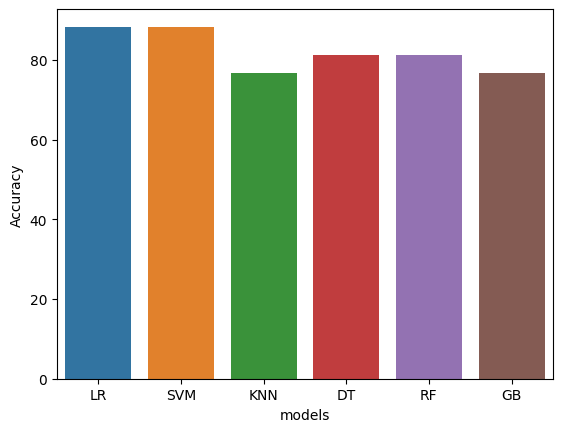

In [62]:
sns.barplot(x='models', y='Accuracy' ,data=final)

> # logistic regression  is used because its accuracy is very high 

> # prediction on the unseen data created by me 

In [65]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'ssc_b':0,
    'hsc_p':91.0,
    'hsc_b':0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
     'specialisation':1,
    'mba_p':58.8,   
},index=[0])

In [66]:
new_data_2 = pd.DataFrame({
    'gender':0,
    'ssc_p':0,
    'ssc_b':0,
    'hsc_p':0,
    'hsc_b':0,
    'hsc_s':0,
    'degree_p':0,
    'degree_t':0,
    'workex':0,
    'etest_p':0,
     'specialisation':0,
    'mba_p':0,   
},index=["all data"])

In [67]:
# if else code to predict the status 
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.98


In [68]:
p=lr.predict(new_data_2)
prob=lr.predict_proba(new_data_2)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Not-placed


> # saving the logistic regression into a file 

In [69]:
import pickle 



In [70]:
with open ('model.pkl' ,'wb') as file :
    pickle.dump(lr,file)